> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB Movies Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

It contains about 21 columns of data which are id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj.

As the heading explains what kind of data the columns holds.

The folowing Questions will be answered according to the data we have:


Q1: What gener is the most popular and if the gener is related with the high profits?

Q2:  What factors influnce the rating of a movie?

Q3: who's the director that made the largest movies and who made the least and 10 top ranking?


In [85]:
# Use this cell to set up import statements for all of the packages that you
#  Importing the packages neede for the analysis 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

Eploring the data 

### General Properties

In [86]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [87]:
# finding the shape of this data 
df.shape

(10866, 21)

The Data have 10866 rows of Movies and 21 columns

In [88]:
#inspecting for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       



So the 21 Columns have 10866 rows of data, but some of them have missing values (homepage ,director,tagline,overview,genres,production_companies,keywords,cast,imdb_id).

In the analysis process some of the columns will be droped, be cleaned from duplication and deal with null values





### Data Cleaning (Cleaning Data!)

after Exploring the data the following columns should be removed:
homepage,tagline,overview,keywords,imdb_idm,budget and revenue as I dont need them in this analysis 

In [89]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df_d = df.drop(['budget','revenue','imdb_id','homepage','tagline','keywords','overview'], axis=1)
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   original_title        10866 non-null  object 
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [90]:
# finding if the data is duplicated
df_d.duplicated().sum()

1

There is 1 indinitical duplication of data in the row

In [91]:
# checking the unique values of the id
df_d['id'].nunique()

10865

10865 are unique values and the remainding 1 value is not unique(repeated)

In [92]:
# looking at the duplicated row
df_d[df_d.duplicated()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


the movies TEKKEN is duplicated having ID = 42194

In [93]:
# cheching the both indentical rows
df_d[df_d.id==42194]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [94]:
# droping the duplicated rows 
df_d.drop_duplicates(inplace=True)

In [95]:
# checking if the data is droped 
df_d.duplicated().sum()

0

In [96]:
#looking how many null values in each columns
df_d.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64



There are some columns with unknown values, mostly in the production companies then comes the cast , followed bu directores and geners. 

the best solution is to replace this null values as unknown



In [97]:
# filling the null values with unknown
df_d.fillna('unknown', inplace=True)

# rechecking null value
df_d.isnull().sum()    

id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [14]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   original_title        10865 non-null  object 
 3   cast                  10865 non-null  object 
 4   director              10865 non-null  object 
 5   runtime               10865 non-null  int64  
 6   genres                10865 non-null  object 
 7   production_companies  10865 non-null  object 
 8   release_date          10865 non-null  object 
 9   vote_count            10865 non-null  int64  
 10  vote_average          10865 non-null  float64
 11  release_year          10865 non-null  int64  
 12  budget_adj            10865 non-null  float64
 13  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB




Now the data is cleaned and there is no null value/duplication but need some adjectment in some column titles 



In [98]:
# changing columns name
df_d.rename({'budget_adj' : 'budget' , 'revenue_adj' : 'revenue'}, axis=1, inplace=True)

# creating Profit Column = Revenue - Budget 
df_d['profit'] = df_d['revenue'] - df_d['budget']

In [99]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   original_title        10865 non-null  object 
 3   cast                  10865 non-null  object 
 4   director              10865 non-null  object 
 5   runtime               10865 non-null  int64  
 6   genres                10865 non-null  object 
 7   production_companies  10865 non-null  object 
 8   release_date          10865 non-null  object 
 9   vote_count            10865 non-null  int64  
 10  vote_average          10865 non-null  float64
 11  release_year          10865 non-null  int64  
 12  budget                10865 non-null  float64
 13  revenue               10865 non-null  float64
 14  profit                10865 non-null  float64
dtypes: float64(5), int64(4),

Now the data is clean

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### General look


In [100]:
df_d.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,3.381911e+07
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,1.252194e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,1.293091e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09




In the following table, the maximum run time is 900 minutes also it achived around 2.7 billion stunning, and the mean of runtime is around 102 minutes. However a movie with 0 minutes runtime is strange unlike budget & revenue which is acceptable.



In [101]:
#checking the movies with 0 runtime
df_d[df_d['runtime'] == 0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit
92,370687,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0,0.000000e+00
334,361931,0.357654,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0,0.000000e+00
410,339342,0.097514,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,unknown,1/1/15,15,5.6,2015,0.000000e+00,0.0,0.000000e+00
445,353345,0.218528,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0,0.000000e+00
486,333653,0.176744,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0,0.000000e+00
595,341051,0.028725,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,unknown,1/1/15,11,4.6,2015,0.000000e+00,0.0,0.000000e+00
616,325843,0.026797,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,unknown,11/10/15,20,6.6,2015,0.000000e+00,0.0,0.000000e+00
1241,296370,0.135376,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,unknown,0,Romance|Music|Comedy,unknown,1/1/14,18,5.7,2014,0.000000e+00,0.0,0.000000e+00
1289,286372,0.037459,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0,-2.993546e+06
1293,286256,0.036904,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0,0.000000e+00


These are the movies with 0 runtime

In [104]:
#creating a copy so it will not cause confusion
df1=df_d.copy()
# finding the number of movies with 0 runtime
df1.query('runtime == 0').count()

id                      31
popularity              31
original_title          31
cast                    31
director                31
runtime                 31
genres                  31
production_companies    31
release_date            31
vote_count              31
vote_average            31
release_year            31
budget                  31
revenue                 31
profit                  31
dtype: int64

drop the 31 movies as they have 0 runtime 

In [105]:
# droping the rows with 0 runtime

df1.drop(df_d[df_d.runtime==0].index, inplace=True)
df1.query('runtime==0').count().sum()


0

In [106]:
# checking the columns 
df1.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,1.083400e+04,1.083400e+04,1.083400e+04
mean,65750.128854,0.647762,102.363855,217.962064,5.976343,2001.295274,1.759896e+07,5.151599e+07,3.391703e+07
std,91819.986178,1.001204,30.948225,576.370933,0.935047,12.819708,3.434421e+07,1.448190e+08,1.253850e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10586.250000,0.208536,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20551.000000,0.384691,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75055.000000,0.715448,112.000000,146.000000,6.600000,2011.000000,2.094246e+07,3.389667e+07,1.312114e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


Now the data are clear , howerver the budget and revenu are 0 in min , 25%, 50% which is unsual

In [117]:
#replacing 0 values in revenue and budget 
#defining columns with zero value
cols=['revenue','budget','profit']
#replace zero with np.nan
df1[cols]=df1[cols].apply(lambda cols: cols.replace(0,np.nan),axis=1)
df1.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,5.166000e+03,4.849000e+03,6.157000e+03
mean,65750.128854,0.647762,102.363855,217.962064,5.976343,2001.295274,3.690807e+07,1.151009e+08,5.968119e+07
std,91819.986178,1.001204,30.948225,576.370933,0.935047,12.819708,4.196569e+07,1.988557e+08,1.616409e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,-4.139124e+08
25%,10586.250000,0.208536,90.000000,17.000000,5.400000,1995.000000,8.103886e+06,1.046585e+07,-5.340135e+06
50%,20551.000000,0.384691,99.000000,38.000000,6.000000,2006.000000,2.273559e+07,4.395666e+07,5.129347e+06
75%,75055.000000,0.715448,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08,6.135050e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


Panda will ignor any nan value in budget, revenue & profit column and be caluculated according to the values in the data

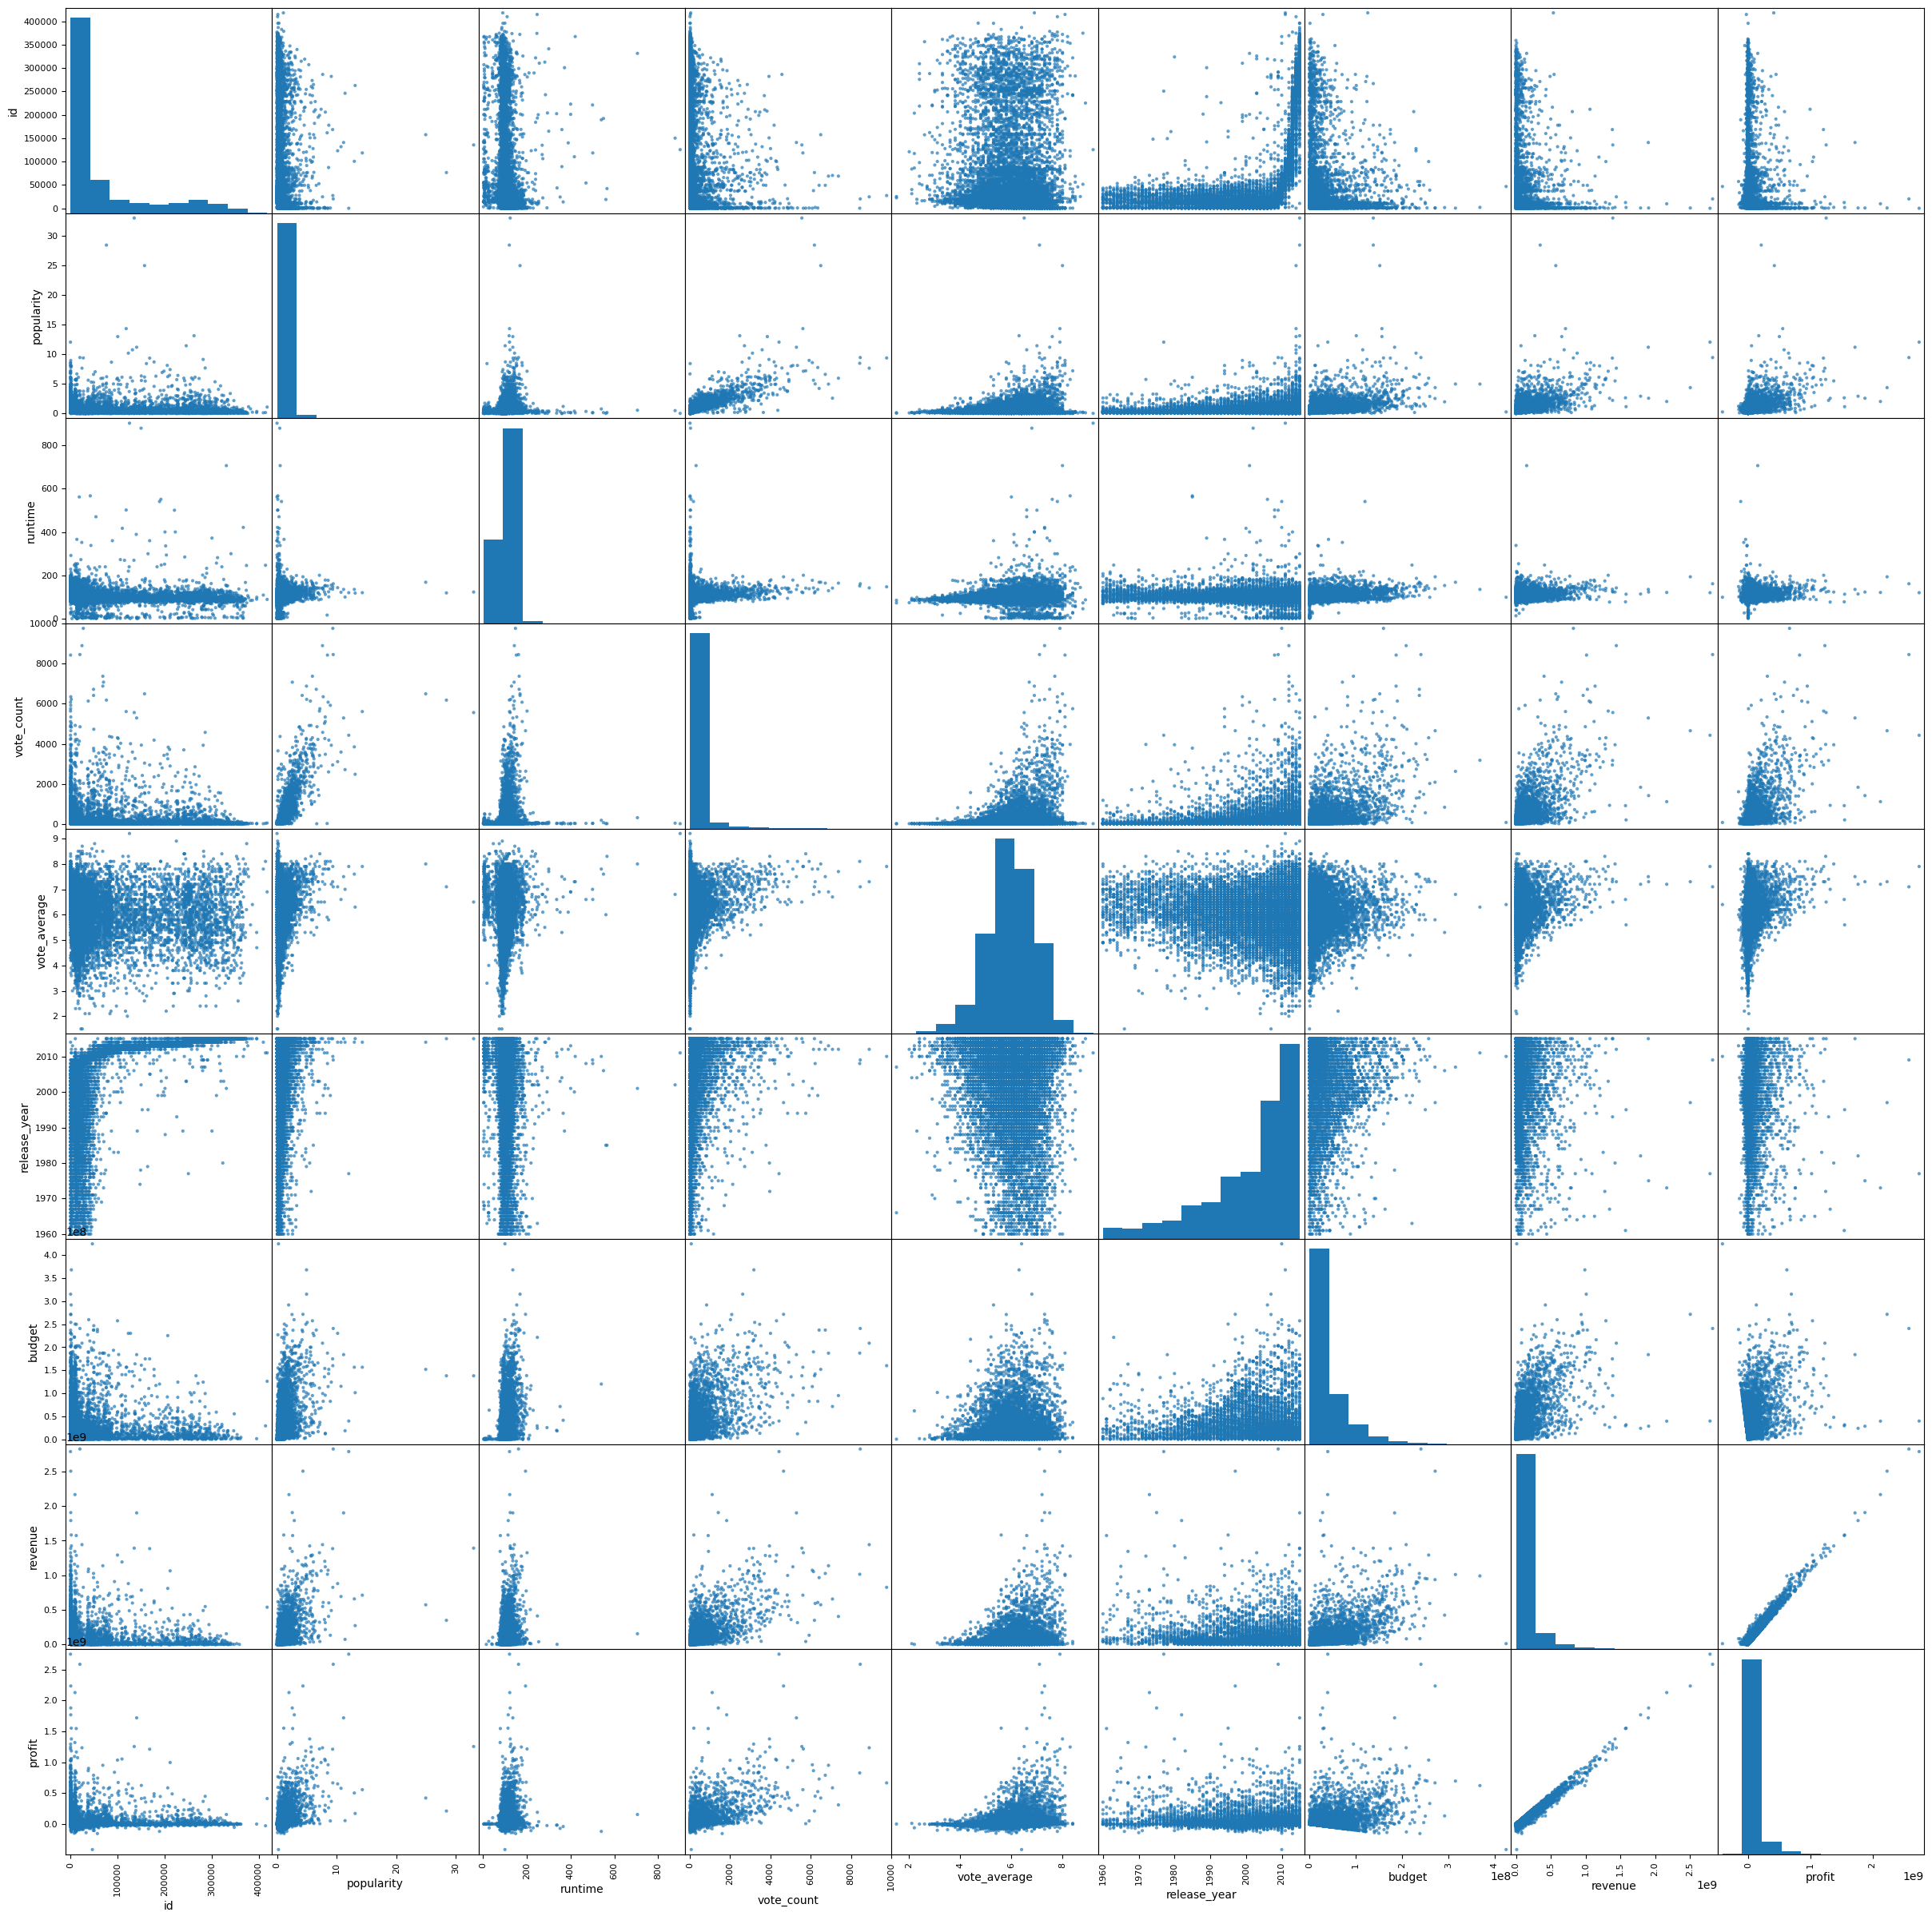

In [146]:
# ploting the data columns
pd.plotting.scatter_matrix(df1,alpha = 0.7, figsize=(30,30), grid=True);

as the above illustration have shown:

the revenue and profit are relativelry align with each othere therefore it depends direclty.

also, the id and release year have shown, in 19s the id number was relativly small as it reached 2010 the id number got bigger 

Text(0, 0.5, 'Movies Count')

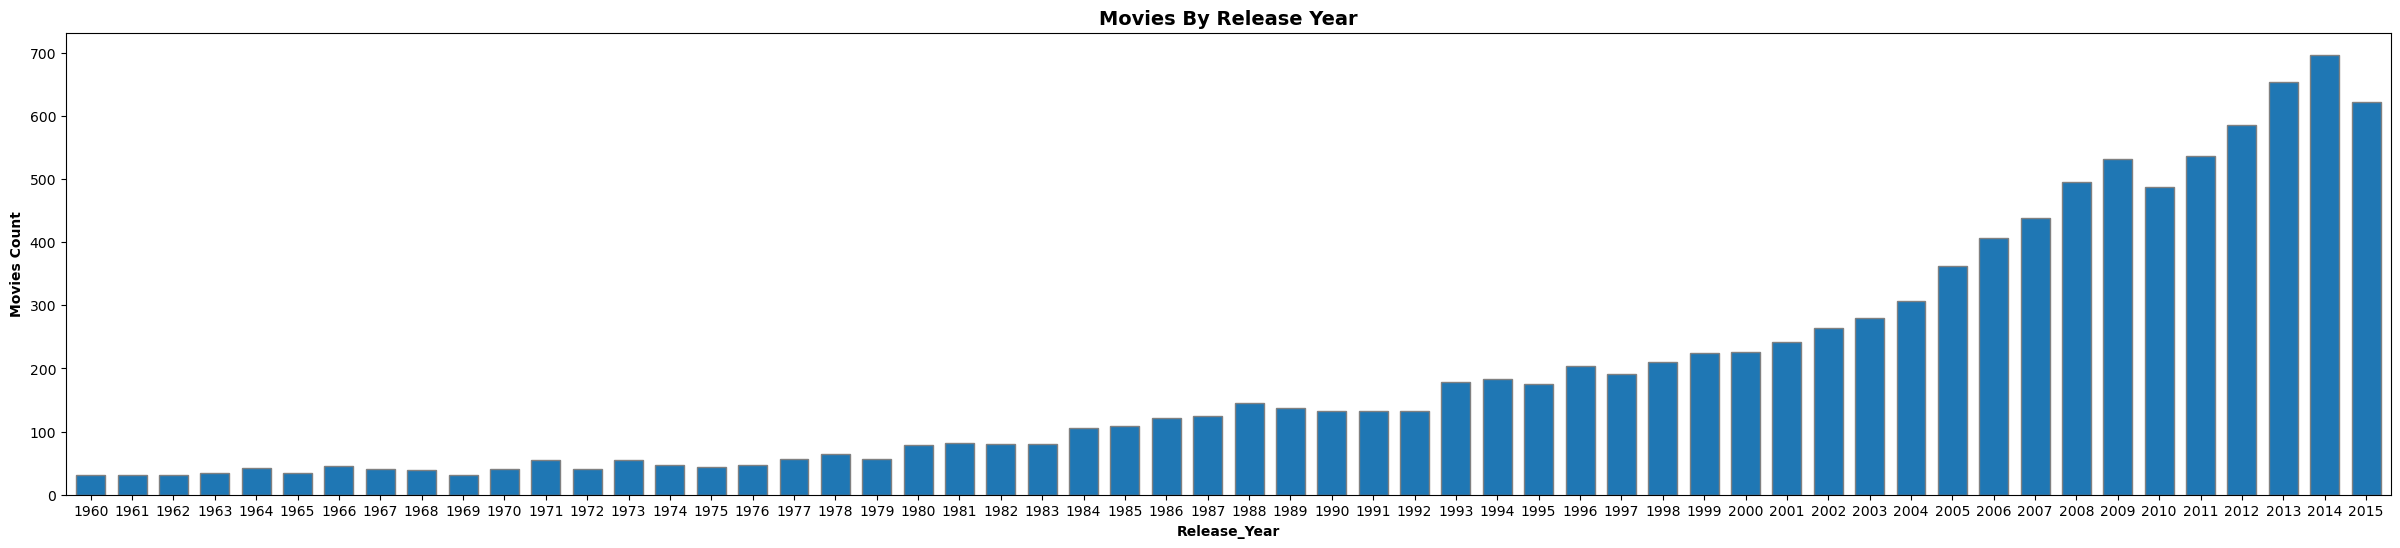

In [152]:
#ploting movies by release year
df1['release_year'].value_counts().sort_index().plot.bar(edgecolor='gray', figsize=[30,6],rot=0,width=0.7);
#graph title
plt.title(f'Movies by release year'.title(),fontsize=14,weight="bold")
# x & y label
plt.xlabel('release_year'.title(), fontsize=10, weight="bold")
plt.ylabel('Movies Count'.title(), fontsize=10, weight="bold")

the graph shows an increase in movies makeing in 1984 and rapeadly increasing since then. 
2014 produced about 650 movies and it was the it it peak 


### Research Question 1 (The most popular gener and its profits)


Finding the popular genre watched and profitable to produce.
    


In [148]:
popular_g=df1
#popular_g stands for popular genre

In [149]:
# spliting genre
popular_g= popular_g.assign(genres=popular_g.genres.str.split("|")).explode('genres')
popular_g.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


In [150]:
#sort popularity of the movie by genres
genres_popularity = popular_g.groupby(['genres'],as_index=False)['popularity'].mean().sort_values(by=['popularity'])
genres_popularity



,genres,popularity
20,unknown,0.171879
5,Documentary,0.181698
9,Foreign,0.192147
16,TV Movie,0.273758
11,Horror,0.466995
12,Music,0.493940
10,History,0.575936
19,Western,0.590615
6,Drama,0.592374
3,Comedy,0.593997


In [151]:
# ploting the Popular movies genre
def GP(df,x0,y0,stat='mean',figsize=[20,7],color='green'):
    df.groupby(x0)[y0].agg(stat).plot.bar();
    x0=x0.replace("_"," ")
    y0=y0.replace("_"," ")
    #adding title to the graph
    plt.title(f'{stat} of {y0} by {x0}'.title(),fontsize =15, weight="bold")
    # title of x axis
    plt.xlabel(x0.title(),fontsize =12,weight="bold")
    #title of Y axis
    plt.ylabel(f'{stat}{y0}',fontsize =12,weight="bold")

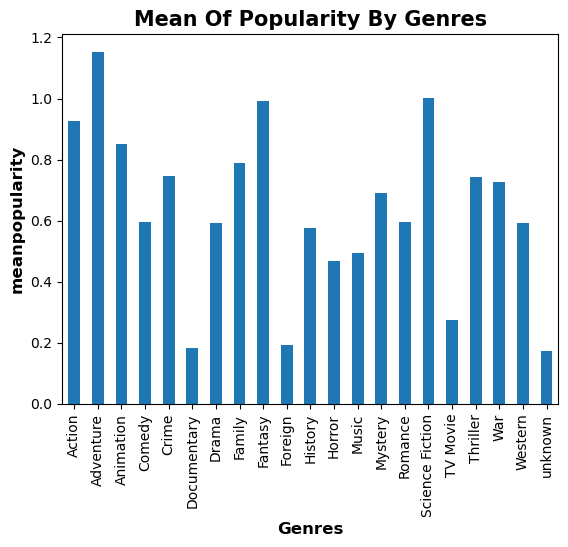

In [124]:
GP(popular_g,'genres','popularity')



the most popular movies are advanture followed by Si-Fi the fantasy ..... and the least popular is the documentray.



In [125]:
# sort profit of the movie by genres
#def calculate_genres_profit(popular_g):
  #  genres_profit = popular_g.groupby(['genres'], as_index=False)['profit'].sum().sort_values(by=['profit'])
    #return genres_profit
genres_profit = popular_g.groupby(['genres'],as_index=False)['profit'].sum().sort_values(by=['profit'])
genres_profit

,genres,profit
9,Foreign,-1.118346e+08
20,unknown,-2.808184e+04
16,TV Movie,8.953509e+06
5,Documentary,8.501937e+08
19,Western,3.564631e+09
10,History,7.144447e+09
18,War,1.108513e+10
12,Music,1.373616e+10
13,Mystery,2.544265e+10
11,Horror,2.671535e+10


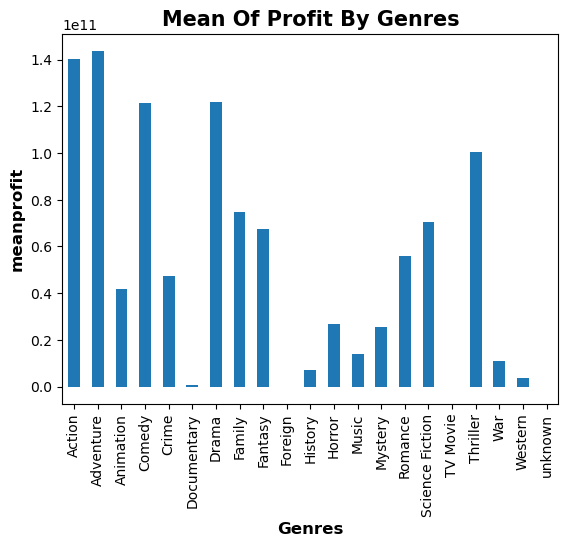

In [126]:
GP(genres_profit,'genres','profit',color='blue')

from the figure above, the adventure genre makes the most profit then followed by action and drama. however Documntry, Foreign are the least profitable movies.

### Research Question 2  (What factors influnce the rating of a movie?)



In [129]:
#let check the rating of movies by genres

factors= popular_g


In [130]:
# finding unique in vote_average
factors.vote_average.nunique()

72

about 72 average votes are distinct 

In [163]:
factors.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
count,26916.000000,26916.000000,26916.000000,26916.000000,26916.000000,26916.000000,1.359600e+04,1.266400e+04,1.595200e+04
mean,58486.631000,0.706791,103.009734,250.333445,5.958021,2000.678333,4.171064e+07,1.296025e+08,6.733879e+07
std,86510.047247,1.115493,30.043147,638.422052,0.912031,12.767995,4.506606e+07,2.159459e+08,1.768776e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,-4.139124e+08
25%,10197.000000,0.225197,90.000000,18.000000,5.400000,1994.000000,9.716462e+06,1.323018e+07,-6.087026e+06
50%,18176.000000,0.411816,100.000000,44.000000,6.000000,2005.000000,2.655224e+07,5.083352e+07,6.935023e+06
75%,58105.500000,0.776305,112.000000,174.000000,6.600000,2011.000000,5.818855e+07,1.526580e+08,6.888481e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


Text(0, 0.5, 'Frequency')

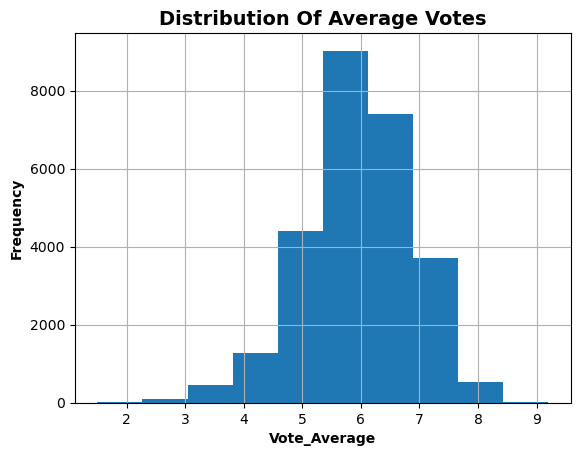

In [164]:
# vote_average movies
factors.vote_average.hist()
#graph title
plt.title(f'Distribution of average votes'.title(),fontsize=14,weight="bold")
# x & y label
plt.xlabel('vote_average'.title(), fontsize=10, weight="bold")
plt.ylabel('Frequency'.title(), fontsize=10, weight="bold")

This vote is not clear so we categorize these vote_average into Low, high, meduim.

C:\Users\may1b\AppData\Local\Temp\ipykernel_2092\823000630.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(x0)[y0].agg(stat).plot.bar();


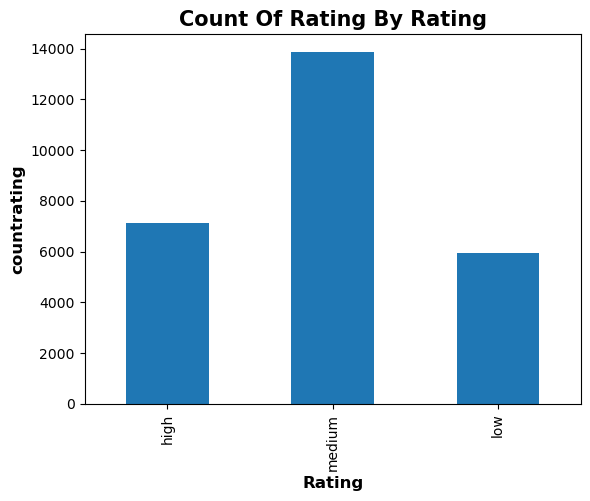

In [173]:
# categorizing votes_average 
GP(factors,'rating','rating',stat='count',color='orange',figsize=[12,6])

so meduim rating movies have the most vote almost 13500 followed by high which represent about 50% of meduim rating the low

In [174]:
#finding the number of high, medium, low rating movies
rating_high = factors.rating =='high'
rating_medium = factors.rating =='medium'
rating_low = factors.rating =='low'
factors[rating_high].count(),factors[rating_medium].count(),factors[rating_low].count()

(id                      7106
 popularity              7106
 original_title          7106
 cast                    7106
 director                7106
 runtime                 7106
 genres                  7106
 production_companies    7106
 release_date            7106
 vote_count              7106
 vote_average            7106
 release_year            7106
 budget                  3150
 revenue                 2324
 profit                  3621
 rating                  7106
 dtype: int64,
 id                      13876
 popularity              13876
 original_title          13876
 cast                    13876
 director                13876
 runtime                 13876
 genres                  13876
 production_companies    13876
 release_date            13876
 vote_count              13876
 vote_average            13876
 release_year            13876
 budget                   7235
 revenue                  7097
 profit                   8608
 rating                  13876
 dtype: i

About 7106 movies have High rating, 13876 movies have meduim rating and 5930 movies have Low rating 

Text(0, 0.5, 'Frequency')

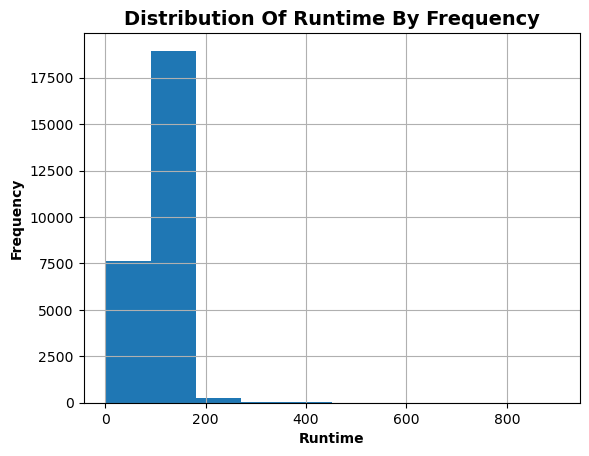

In [183]:
factors.runtime.hist()
#graph title
plt.title(f'Distribution of runtime by frequency'.title(),fontsize=14,weight="bold")
# x & y label
plt.xlabel('runtime'.title(), fontsize=10, weight="bold")
plt.ylabel('frequency'.title(), fontsize=10, weight="bold")

there are about 7500 movies that have 0 runtime which is unsual and more that 17500 movies with 1 hour runtime 

### Research Question 2  (who's the director that made the largest movies and who made the least and the top 10 in ranking?)

In [184]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
mv_director = df1

In [185]:
#finding the directors name that are not repetive
mv_director.director.nunique()

5051

about 5051 director are distinct 

In [186]:
# split the directors name | as one movies can have many director
mv_director = mv_director.assign(director=mv_director.director.str.split('|')).explode('director')
mv_director.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [187]:
# counting the movies that are produced by the director
Mv_Pby_director=mv_director.director.value_counts()
Mv_Pby_director

director
Woody Allen         46
unknown             42
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
                    ..
Brett Simon          1
Mike Maguire         1
Tom Kuntz            1
John Simpson         1
Harold P. Warren     1
Name: count, Length: 5344, dtype: int64


The top director is Woody Allen as he made about 46 movies followed by Clint Eastwood (34), Martin Scorses (31) , then Steven Spielberge (30).

regard the unknown value will be ignored.

The least 4 directors are Mike Maguire, Tom Kuntz , John Simpson, Harold P. Warren.

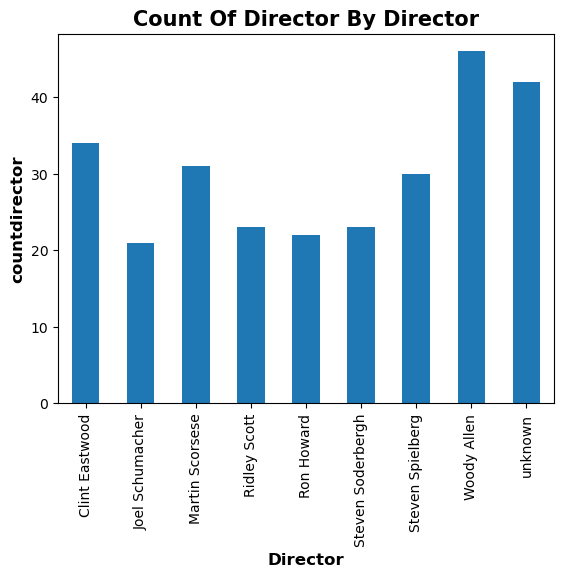

In [188]:
# ploting it to elaborate in easy way 
GP(mv_director.groupby('director').filter(lambda grp: len(grp)>20),'director','director',color='red',stat='count')

Top 10 Directors 

<a id='conclusions'></a>
## Conclusions

After analysing this data it showed that:

1) people prefer to watch advanture movies as it gives them thrills and it makes the highest profit 

2) the movie rating is not effected by the runtime 

3) dirctors who made most movies in the data are (Woody Allen,Clint Eastwood ,Martin Scorsese,Steven Spielberg. howevere ignore the unknown as it is not mentioned

# limitation 
almost about 50% of revenues and budget of the movies are 0 and also profit however i tried to ignors the zero values in it. 

the data i worked on have missing values and the cleaning process mosetly discarded tow-third of it  